In [1]:
#fas-정재환
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np
import csv
import json
import seaborn as sns
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics.cluster import adjusted_rand_score
%matplotlib inline 

In [2]:
#한글 폰트 적용 - 한글깨짐 방지
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv("NHIS_OPEN_GJ_2017_3.csv", encoding='cp949', nrows=7000)
df

,Unnamed: 0,번호,성별,연령,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당,총콜레스테롤,흡연상태,음주여부
0,0,1,1,40,170,75,90.0,120.0,80.0,99.0,193.0,1.0,1.0
1,1,2,1,35,180,80,89.0,130.0,82.0,106.0,228.0,3.0,0.0
2,2,3,1,45,165,75,91.0,120.0,70.0,98.0,136.0,1.0,0.0
3,3,4,1,55,175,80,91.0,145.0,87.0,95.0,201.0,1.0,0.0
4,4,5,1,55,165,60,80.0,138.0,82.0,101.0,199.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,6995,7010,2,40,160,65,91.0,130.0,80.0,80.0,276.0,1.0,0.0
6996,6996,7011,1,25,165,75,83.6,136.0,86.0,79.0,181.0,1.0,0.0
6997,6997,7012,2,70,150,60,88.0,130.0,80.0,108.0,189.0,1.0,0.0
6998,6998,7013,1,60,175,75,91.5,124.0,72.0,104.0,204.0,3.0,0.0


In [6]:
x = df[['신장', '체중', '허리둘레', '수축기혈압', '흡연상태', '음주여부']] #6개의 특성을 가진 데이터
y = df['성별']
scaler = StandardScaler() # 분산을1, 평균0으로 변환하는 스케일러
scaler.fit(x)
x_scaled = scaler.transform(x) # 변환

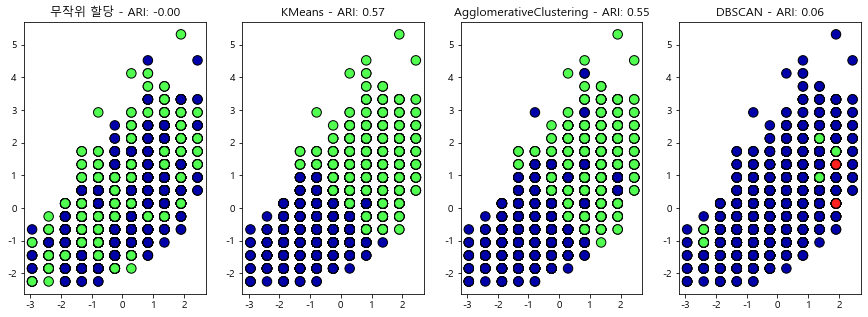

In [7]:
fig ,ax = plt.subplots(1, 4, figsize=(15, 5))

# 사용, 평가할 알고리즘 리스트
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

# 무작위로 클러스터 할당
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(x))

# 무작위로 할당된 클러스터를 그린다
ax[0].scatter(x_scaled[:,0], x_scaled[:,1], c=random_clusters, cmap=mglearn.cm3, s=90, edgecolors='black')
ax[0].set_title('무작위 할당 - ARI: {:.2f}'.format(adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(ax[1:], algorithms):
    # 클러스터 할당과 클러스터 중심을 그린다
    clusters = algorithm.fit_predict(x_scaled)
    ax.scatter(x_scaled[:,0], x_scaled[:,1], c=clusters, cmap=mglearn.cm3, s=90, edgecolors='black')
    ax.set_title('{} - ARI: {:.2f}'.format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))